<a href="https://colab.research.google.com/github/zdychampopixie/Cwiczenie-2/blob/main/Klasyfikacja%20ptak%C3%B3w.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow keras gdown

In [ ]:
!gdown 1r_Qr56czWTxrgnzfy59aRRt2IKcauoK-

Downloading...
From (original): https://drive.google.com/uc?id=1r_Qr56czWTxrgnzfy59aRRt2IKcauoK-
From (redirected): https://drive.google.com/uc?id=1r_Qr56czWTxrgnzfy59aRRt2IKcauoK-&confirm=t&uuid=1436ca1b-78cf-4049-ab41-a901f0471dcd
To: /content/birds.zip
100% 1.13G/1.13G [00:10<00:00, 108MB/s]


In [ ]:
!pip install tensorflow keras gdown

import zipfile
import os
import shutil
import random
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Pobierz plik ZIP z danymi
!gdown --id 1r_Qr56czWTxrgnzfy59aRRt2IKcauoK-

# Klasa ImageClassifier
class ImageClassifier:
    def __init__(self, zip_file_path, dataset_folder="dataset", image_size=(150, 150), batch_size=32):
        self.zip_file_path = zip_file_path
        self.dataset_folder = dataset_folder
        self.image_size = image_size
        self.batch_size = batch_size

    def extract_zip(self):
        with zipfile.ZipFile(self.zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(self.dataset_folder)
        print("Dataset extracted successfully.")

    def prepare_data(self):
        data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

        self.train_data = data_gen.flow_from_directory(
            self.dataset_folder,
            target_size=self.image_size,
            batch_size=self.batch_size,
            class_mode="categorical",
            subset="training"
        )

        self.validation_data = data_gen.flow_from_directory(
            self.dataset_folder,
            target_size=self.image_size,
            batch_size=self.batch_size,
            class_mode="categorical",
            subset="validation"
        )
        self.num_classes = len(self.train_data.class_indices)
        print(f"Data prepared for training and validation. Number of classes: {self.num_classes}")

    def create_model(self):
        self.model = models.Sequential([
            layers.Conv2D(32, (3, 3), activation="relu", input_shape=(*self.image_size, 3)),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3), activation="relu"),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(128, (3, 3), activation="relu"),
            layers.MaxPooling2D((2, 2)),
            layers.Flatten(),
            layers.Dense(512, activation="relu"),
            layers.Dense(self.num_classes, activation="softmax")
        ])

        self.model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
        print("Deep neural network model created and compiled.")

    def train(self, epochs=10):
        self.model.fit(
            self.train_data,
            epochs=epochs,
            validation_data=self.validation_data
        )
        print("Model trained successfully.")

    def plot_model_structure(self):
        self.model.summary()

    def evaluate_learning_rate(self, learning_rates):
        for lr in learning_rates:
            self.model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss="categorical_crossentropy", metrics=["accuracy"])
            print(f"Training with learning rate: {lr}")
            self.train(epochs=5)  # Trenowanie przez 5 epok

    def visualize_random_images(self):
        random_images = np.random.choice(self.validation_data.filenames, size=5)
        for image_path in random_images:
            img = tf.keras.preprocessing.image.load_img(os.path.join(self.dataset_folder, image_path), target_size=self.image_size)
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)

            # Klasyfikacja obrazu
            predictions = self.model.predict(img_array)
            predicted_class = np.argmax(predictions)

            # Wyświetlenie obrazu i wyniku klasyfikacji
            plt.imshow(img)
            plt.title(f"Predicted Class: {predicted_class}")
            plt.show()

# Usage
zip_file_path = "/content/birds.zip"

classifier = ImageClassifier(zip_file_path)
classifier.extract_zip()
classifier.prepare_data()
classifier.create_model()
classifier.train()

# 1. Przetrenowanie sieci
# classifier.train(epochs=50)  # Zwiększenie liczby epok do 50

# 2. Eksperymenty z optymalnymi ustawieniami sieci
# classifier.create_model()
# classifier.train()
# classifier.create_model()
# classifier.train()
# classifier.create_model()
# classifier.train()

# 3. Wyświetlenie struktury sieci
# classifier.plot_model_structure()

# 4. Eksperymenty z learning rate
# learning_rates = [0.001, 0.01, 0.0001]
# classifier.evaluate_learning_rate(learning_rates)

# 5. Wizualizacja 5 losowych obrazów i ich wyników klasyfikacji
# classifier.visualize_random_images()


/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1r_Qr56czWTxrgnzfy59aRRt2IKcauoK-
From (redirected): https://drive.google.com/uc?id=1r_Qr56czWTxrgnzfy59aRRt2IKcauoK-&confirm=t&uuid=84cbd8a5-309a-4a36-b0ac-f1c6a6f796bd
To: /content/birds.zip
100% 1.13G/1.13G [00:07<00:00, 147MB/s]
Dataset extracted successfully.
Found 9465 images belonging to 200 classes.
Found 2323 images belonging to 200 classes.
Data prepared for training and validation. Number of classes: 200
Deep neural network model created and compiled.
Epoch 1/10
296/296 [==============================] - 41s 132ms/step - loss: 5.2642 - accuracy: 0.0089 - val_loss: 5.1189 - val_accuracy: 0.0155
Epoch 2/10
296/296 [==============================] - 36s 123ms/step - loss: 4.7891 - accuracy: 0.0476 - val_

In [ ]:
classifier.train(epochs=50)  # Zwiększenie liczby epok do 50

Epoch 1/50
296/296 [==============================] - 43s 146ms/step - loss: 0.0808 - accuracy: 0.9808 - val_loss: 12.1027 - val_accuracy: 0.0706
Epoch 2/50
296/296 [==============================] - 40s 135ms/step - loss: 0.0346 - accuracy: 0.9911 - val_loss: 13.4503 - val_accuracy: 0.0715
Epoch 3/50
296/296 [==============================] - 41s 137ms/step - loss: 0.0424 - accuracy: 0.9901 - val_loss: 14.2622 - val_accuracy: 0.0659
Epoch 4/50
296/296 [==============================] - 40s 136ms/step - loss: 0.0534 - accuracy: 0.9874 - val_loss: 13.1649 - val_accuracy: 0.0641
Epoch 5/50
296/296 [==============================] - 41s 137ms/step - loss: 0.0446 - accuracy: 0.9888 - val_loss: 15.0508 - val_accuracy: 0.0672
Epoch 6/50
296/296 [==============================] - 38s 130ms/step - loss: 0.0529 - accuracy: 0.9889 - val_loss: 15.0412 - val_accuracy: 0.0637
Epoch 7/50
296/296 [==============================] - 38s 128ms/step - loss: 0.0437 - accuracy: 0.9907 - val_loss: 14.1120 -

In [ ]:
#2. Eksperymenty z optymalnymi ustawieniami sieci
classifier.create_model()
classifier.train()
classifier.create_model()
classifier.train()
classifier.create_model()
classifier.train()

Deep neural network model created and compiled.
Epoch 1/10
296/296 [==============================] - 46s 151ms/step - loss: 5.1647 - accuracy: 0.0104 - val_loss: 4.8904 - val_accuracy: 0.0202
Epoch 2/10
296/296 [==============================] - 39s 133ms/step - loss: 4.6429 - accuracy: 0.0451 - val_loss: 4.4429 - val_accuracy: 0.0555
Epoch 3/10
296/296 [==============================] - 40s 135ms/step - loss: 3.7382 - accuracy: 0.1685 - val_loss: 4.2863 - val_accuracy: 0.0981
Epoch 4/10
296/296 [==============================] - 44s 148ms/step - loss: 2.0534 - accuracy: 0.5033 - val_loss: 5.2168 - val_accuracy: 0.1003
Epoch 5/10
296/296 [==============================] - 39s 131ms/step - loss: 0.6036 - accuracy: 0.8489 - val_loss: 7.4989 - val_accuracy: 0.0990
Epoch 6/10
296/296 [==============================] - 40s 135ms/step - loss: 0.1775 - accuracy: 0.9590 - val_loss: 9.2591 - val_accuracy: 0.0981
Epoch 7/10
296/296 [==============================] - 40s 135ms/step - loss: 0.096

In [ ]:
# 3. Wyświetlenie struktury sieci
classifier.plot_model_structure()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 17, 17, 128)      

In [ ]:
# 4. Eksperymenty z learning rate
learning_rates = [0.001, 0.01, 0.0001]
classifier.evaluate_learning_rate(learning_rates)

Training with learning rate: 0.001
Epoch 1/5
296/296 [==============================] - 42s 137ms/step - loss: 0.0766 - accuracy: 0.9793 - val_loss: 12.2269 - val_accuracy: 0.1093
Epoch 2/5
296/296 [==============================] - 43s 144ms/step - loss: 0.0478 - accuracy: 0.9893 - val_loss: 11.9254 - val_accuracy: 0.1025
Epoch 3/5
296/296 [==============================] - 41s 137ms/step - loss: 0.0587 - accuracy: 0.9854 - val_loss: 12.2999 - val_accuracy: 0.1046
Epoch 4/5
296/296 [==============================] - 43s 146ms/step - loss: 0.0868 - accuracy: 0.9800 - val_loss: 11.8936 - val_accuracy: 0.1046
Epoch 5/5
296/296 [==============================] - 41s 138ms/step - loss: 0.0456 - accuracy: 0.9892 - val_loss: 12.3586 - val_accuracy: 0.1158
Model trained successfully.
Training with learning rate: 0.01
Epoch 1/5
296/296 [==============================] - 46s 149ms/step - loss: 5.2725 - accuracy: 0.0233 - val_loss: 5.2989 - val_accuracy: 0.0052
Epoch 2/5
296/296 [===============

1/1 [==============================] - 0s 329ms/step


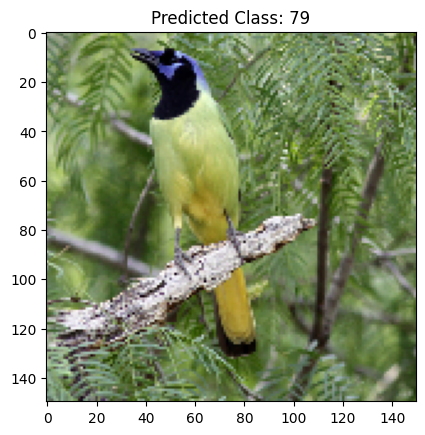

1/1 [==============================] - 0s 34ms/step


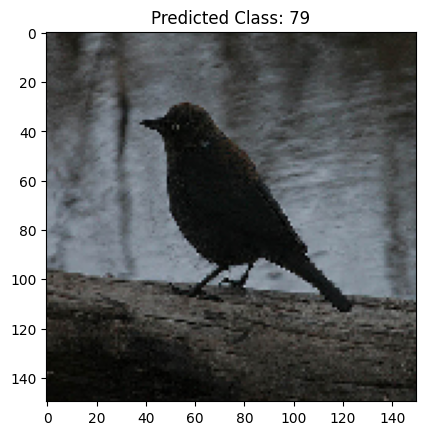

1/1 [==============================] - 0s 17ms/step


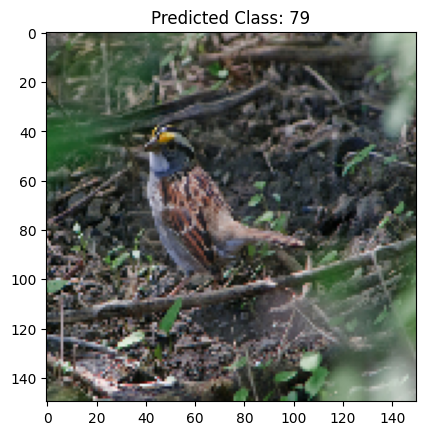

1/1 [==============================] - 0s 25ms/step


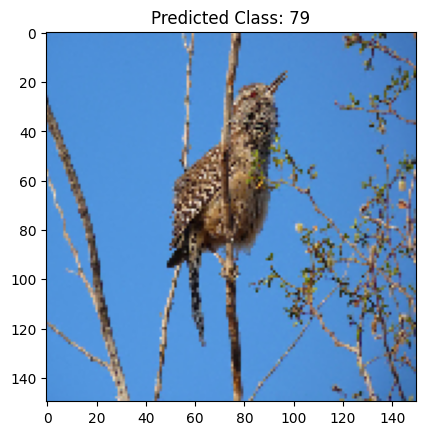

1/1 [==============================] - 0s 25ms/step


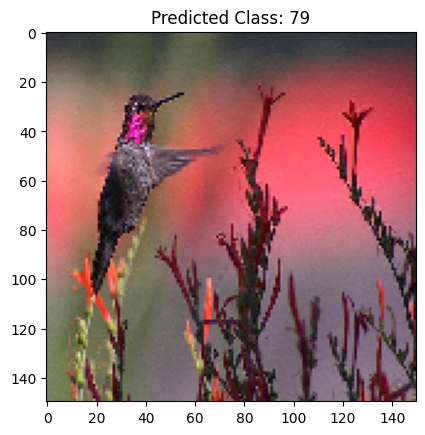

In [ ]:
# 5. Wizualizacja 5 losowych obrazów i ich wyników klasyfikacji
classifier.visualize_random_images()

Klasyfikacja z innym modelem

In [ ]:
!pip install tensorflow keras gdown

import zipfile
import os
import shutil
import random
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Pobierz plik ZIP z danymi
!gdown --id 1r_Qr56czWTxrgnzfy59aRRt2IKcauoK-

# Klasa ImageClassifier
class ImageClassifier:
    def __init__(self, zip_file_path, dataset_folder="dataset", image_size=(150, 150), batch_size=32):
        self.zip_file_path = zip_file_path
        self.dataset_folder = dataset_folder
        self.image_size = image_size
        self.batch_size = batch_size

    def extract_zip(self):
        with zipfile.ZipFile(self.zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(self.dataset_folder)
        print("Dataset extracted successfully.")

    def prepare_data(self):
        data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

        self.train_data = data_gen.flow_from_directory(
            self.dataset_folder,
            target_size=self.image_size,
            batch_size=self.batch_size,
            class_mode="categorical",
            subset="training"
        )

        self.validation_data = data_gen.flow_from_directory(
            self.dataset_folder,
            target_size=self.image_size,
            batch_size=self.batch_size,
            class_mode="categorical",
            subset="validation"
        )
        self.num_classes = len(self.train_data.class_indices)
        print(f"Data prepared for training and validation. Number of classes: {self.num_classes}")

    def create_model(self):
        # Poprawiony model z większą ilością warstw
        self.model = models.Sequential([
            layers.Conv2D(32, (3, 3), activation="relu", input_shape=(*self.image_size, 3)),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3), activation="relu"),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(128, (3, 3), activation="relu"),
            layers.MaxPooling2D((2, 2)),
            layers.Flatten(),
            layers.Dense(512, activation="relu"),
            layers.Dropout(0.5),  # Dodana warstwa Dropout
            layers.Dense(256, activation="relu"),  # Dodana dodatkowa warstwa Dense
            layers.Dropout(0.3),  # Dodana warstwa Dropout
            layers.Dense(self.num_classes, activation="softmax")
        ])

        self.model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
        print("Deep neural network model created and compiled.")

    def train(self, epochs=10):
        self.history = self.model.fit(
            self.train_data,
            epochs=epochs,
            validation_data=self.validation_data
        )
        print("Model trained successfully.")

    def plot_model_structure(self):
        self.model.summary()

    def evaluate_validation(self):
        # Poprawienie błędu walidacji
        self.create_model()
        self.train(epochs=20)  # Zwiększenie liczby epok
        self.plot_model_structure()

    def evaluate_dropout(self):
        # Eksperymenty z Dropout
        for i in range(3):
            self.create_model()
            self.train(epochs=10)
            self.plot_model_structure()

    def evaluate_learning_rate(self, learning_rates):
        for lr in learning_rates:
            self.model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss="categorical_crossentropy", metrics=["accuracy"])
            print(f"Training with learning rate: {lr}")
            self.train(epochs=5)  # Trenowanie przez 5 epok

    def visualize_random_images(self):
        random_images = np.random.choice(self.validation_data.filenames, size=5)
        for image_path in random_images:
            img = tf.keras.preprocessing.image.load_img(os.path.join(self.dataset_folder, image_path), target_size=self.image_size)
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)

            # Klasyfikacja obrazu
            predictions = self.model.predict(img_array)
            predicted_class = np.argmax(predictions)

            # Wyświetlenie obrazu i wyniku klasyfikacji
            plt.imshow(img)
            plt.title(f"Predicted Class: {predicted_class}")
            plt.show()

# Usage
zip_file_path = "/content/birds.zip"

classifier = ImageClassifier(zip_file_path)
classifier.extract_zip()
classifier.prepare_data()
classifier.create_model()
classifier.train()



/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1r_Qr56czWTxrgnzfy59aRRt2IKcauoK-
From (redirected): https://drive.google.com/uc?id=1r_Qr56czWTxrgnzfy59aRRt2IKcauoK-&confirm=t&uuid=f380cce6-ef4e-4680-b585-e0d45bfd62ba
To: /content/birds.zip
100% 1.13G/1.13G [00:10<00:00, 104MB/s] 
Dataset extracted successfully.
Found 9465 images belonging to 200 classes.
Found 2323 images belonging to 200 classes.
Data prepared for training and validation. Number of classes: 200
Deep neural network model created and compiled.
Epoch 1/10
296/296 [==============================] - 58s 172ms/step - loss: 5.3046 - accuracy: 0.0037 - val_loss: 5.2979 - val_accuracy: 0.0047
Epoch 2/10
296/296 [==============================] - 43s 144ms/step - loss: 5.2995 - accuracy: 0.0048 - val

In [ ]:
# 1. Przetrenowanie sieci
classifier.train(epochs=50)  # Zwiększenie liczby epok do 50



Epoch 1/50
296/296 [==============================] - 59s 199ms/step - loss: 2.4112 - accuracy: 0.3892 - val_loss: 4.3412 - val_accuracy: 0.1270
Epoch 2/50
296/296 [==============================] - 45s 151ms/step - loss: 2.0154 - accuracy: 0.4728 - val_loss: 4.4663 - val_accuracy: 0.1197
Epoch 3/50
296/296 [==============================] - 42s 142ms/step - loss: 1.6488 - accuracy: 0.5664 - val_loss: 4.6534 - val_accuracy: 0.1180
Epoch 4/50
296/296 [==============================] - 42s 142ms/step - loss: 1.4365 - accuracy: 0.6187 - val_loss: 4.7835 - val_accuracy: 0.1171
Epoch 5/50
296/296 [==============================] - 42s 142ms/step - loss: 1.2044 - accuracy: 0.6756 - val_loss: 4.8268 - val_accuracy: 0.1244
Epoch 6/50
296/296 [==============================] - 43s 144ms/step - loss: 1.0461 - accuracy: 0.7214 - val_loss: 5.0499 - val_accuracy: 0.1283
Epoch 7/50
296/296 [==============================] - 41s 139ms/step - loss: 0.8973 - accuracy: 0.7556 - val_loss: 5.1633 - val_ac

In [ ]:
# 2. Sprawdzenie nowego modelu
classifier.create_model()
classifier.train()
classifier.create_model()
classifier.train()
classifier.create_model()
classifier.train()


Deep neural network model created and compiled.
Epoch 1/10
296/296 [==============================] - 46s 150ms/step - loss: 5.3053 - accuracy: 0.0037 - val_loss: 5.2980 - val_accuracy: 0.0052
Epoch 2/10
296/296 [==============================] - 43s 146ms/step - loss: 5.2997 - accuracy: 0.0033 - val_loss: 5.2977 - val_accuracy: 0.0052
Epoch 3/10
296/296 [==============================] - 48s 161ms/step - loss: 5.3004 - accuracy: 0.0042 - val_loss: 5.2977 - val_accuracy: 0.0047
Epoch 4/10
296/296 [==============================] - 43s 144ms/step - loss: 5.2997 - accuracy: 0.0042 - val_loss: 5.2975 - val_accuracy: 0.0043
Epoch 5/10
296/296 [==============================] - 46s 157ms/step - loss: 5.2992 - accuracy: 0.0041 - val_loss: 5.2973 - val_accuracy: 0.0043
Epoch 6/10
296/296 [==============================] - 48s 161ms/step - loss: 5.2947 - accuracy: 0.0045 - val_loss: 5.2879 - val_accuracy: 0.0065
Epoch 7/10
296/296 [==============================] - 43s 147ms/step - loss: 5.147

In [ ]:
# 3. Poprawa błędu walidacji
classifier.evaluate_validation()



Deep neural network model created and compiled.
Epoch 1/20
296/296 [==============================] - 51s 165ms/step - loss: 5.2671 - accuracy: 0.0070 - val_loss: 5.1170 - val_accuracy: 0.0138
Epoch 2/20
296/296 [==============================] - 43s 146ms/step - loss: 5.0207 - accuracy: 0.0192 - val_loss: 4.8137 - val_accuracy: 0.0323
Epoch 3/20
296/296 [==============================] - 48s 162ms/step - loss: 4.7129 - accuracy: 0.0333 - val_loss: 4.5372 - val_accuracy: 0.0474
Epoch 4/20
296/296 [==============================] - 48s 162ms/step - loss: 4.4871 - accuracy: 0.0517 - val_loss: 4.4180 - val_accuracy: 0.0607
Epoch 5/20
296/296 [==============================] - 48s 162ms/step - loss: 4.2187 - accuracy: 0.0759 - val_loss: 4.2423 - val_accuracy: 0.0723
Epoch 6/20
296/296 [==============================] - 46s 156ms/step - loss: 3.8751 - accuracy: 0.1256 - val_loss: 4.0918 - val_accuracy: 0.0964
Epoch 7/20
296/296 [==============================] - 49s 164ms/step - loss: 3.471

In [ ]:
# 4. Eksperymenty z Dropout
classifier.evaluate_dropout()




Deep neural network model created and compiled.
Epoch 1/10
296/296 [==============================] - 51s 166ms/step - loss: 5.2873 - accuracy: 0.0042 - val_loss: 5.2095 - val_accuracy: 0.0090
Epoch 2/10
296/296 [==============================] - 45s 152ms/step - loss: 5.1289 - accuracy: 0.0163 - val_loss: 5.0023 - val_accuracy: 0.0202
Epoch 3/10
296/296 [==============================] - 50s 169ms/step - loss: 4.8795 - accuracy: 0.0262 - val_loss: 4.7407 - val_accuracy: 0.0448
Epoch 4/10
296/296 [==============================] - 48s 161ms/step - loss: 4.5456 - accuracy: 0.0529 - val_loss: 4.4936 - val_accuracy: 0.0654
Epoch 5/10
296/296 [==============================] - 49s 166ms/step - loss: 4.2285 - accuracy: 0.0828 - val_loss: 4.3265 - val_accuracy: 0.0715
Epoch 6/10
296/296 [==============================] - 48s 162ms/step - loss: 3.8960 - accuracy: 0.1325 - val_loss: 4.2544 - val_accuracy: 0.0908
Epoch 7/10
296/296 [==============================] - 50s 168ms/step - loss: 3.485

In [ ]:
# 5. Wyświetlenie struktury sieci
classifier.plot_model_structure()




Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_40 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_41 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_41 (MaxPooli  (None, 17, 17, 128)     

In [ ]:
# 6. Eksperymenty z learning rate
learning_rates = [0.001, 0.01, 0.0001]
classifier.evaluate_learning_rate(learning_rates)



Training with learning rate: 0.001
Epoch 1/5
296/296 [==============================] - 48s 155ms/step - loss: 4.9104 - accuracy: 0.0263 - val_loss: 4.8623 - val_accuracy: 0.0276
Epoch 2/5
296/296 [==============================] - 49s 167ms/step - loss: 4.6536 - accuracy: 0.0448 - val_loss: 4.6088 - val_accuracy: 0.0405
Epoch 3/5
296/296 [==============================] - 50s 169ms/step - loss: 4.3661 - accuracy: 0.0696 - val_loss: 4.5108 - val_accuracy: 0.0542
Epoch 4/5
296/296 [==============================] - 49s 166ms/step - loss: 4.0293 - accuracy: 0.1148 - val_loss: 4.4588 - val_accuracy: 0.0646
Epoch 5/5
296/296 [==============================] - 47s 159ms/step - loss: 3.6845 - accuracy: 0.1626 - val_loss: 4.3955 - val_accuracy: 0.0736
Model trained successfully.
Training with learning rate: 0.01
Epoch 1/5
296/296 [==============================] - 52s 169ms/step - loss: 4.9720 - accuracy: 0.0210 - val_loss: 5.0030 - val_accuracy: 0.0133
Epoch 2/5
296/296 [====================

1/1 [==============================] - 0s 120ms/step


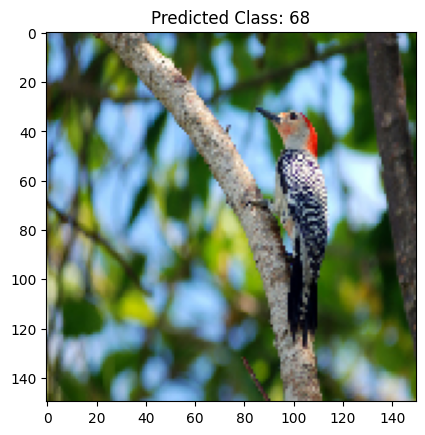

1/1 [==============================] - 0s 36ms/step


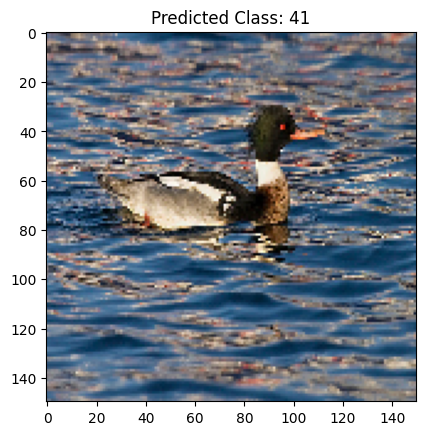

1/1 [==============================] - 0s 24ms/step


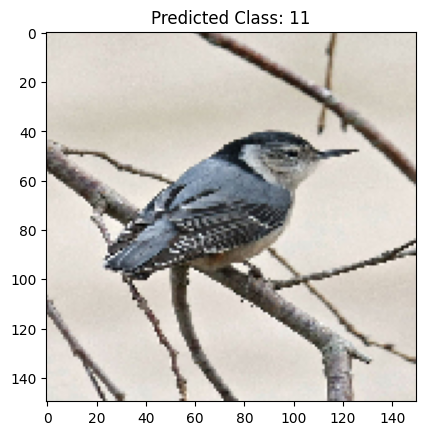

1/1 [==============================] - 0s 26ms/step


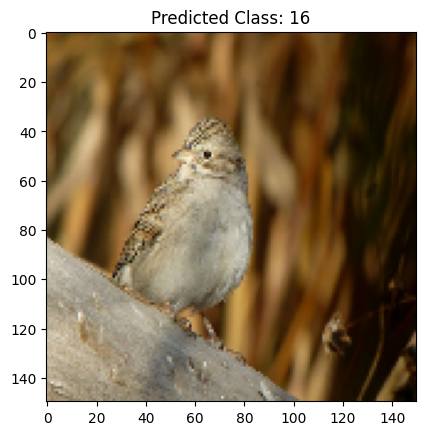

1/1 [==============================] - 0s 21ms/step


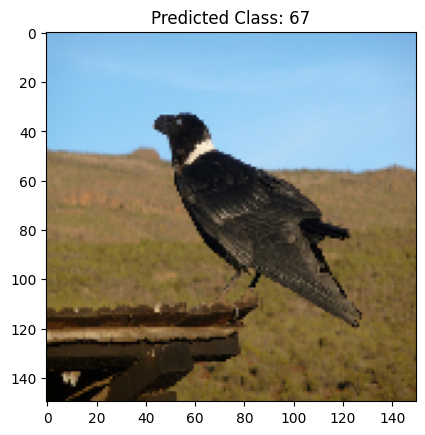

In [ ]:
# 7. Wizualizacja 5 losowych obrazów i ich wyników klasyfikacji
classifier.visualize_random_images()


Dataset extracted successfully.
Found 9465 images belonging to 200 classes.
Found 2323 images belonging to 200 classes.
Data prepared for training and validation. Number of classes: 200
58889256/58889256 [==============================] - 0s 0us/step
Model with transfer learning created and compiled.
Epoch 1/10
296/296 [==============================] - 54s 159ms/step - loss: 4.9895 - accuracy: 0.0264 - val_loss: 4.4987 - val_accuracy: 0.0616
Epoch 2/10
296/296 [==============================] - 42s 141ms/step - loss: 4.0670 - accuracy: 0.1071 - val_loss: 4.0171 - val_accuracy: 0.1093
Epoch 3/10
296/296 [==============================] - 41s 139ms/step - loss: 3.4525 - accuracy: 0.1905 - val_loss: 3.7381 - val_accuracy: 0.1373
Epoch 4/10
296/296 [==============================] - 43s 146ms/step - loss: 3.0164 - accuracy: 0.2671 - val_loss: 3.6406 - val_accuracy: 0.1731
Epoch 5/10
296/296 [==============================] - 42s 140ms/step - loss: 2.6677 - accuracy: 0.3439 - val_loss: 3.5

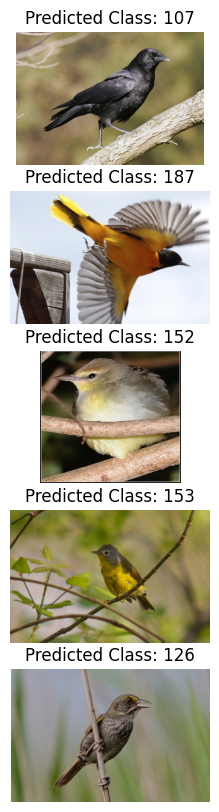

In [ ]:

import zipfile
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16, VGG19, ResNet50

# Class for Image Classification with Transfer Learning
class ImageClassifier:
    def __init__(self, zip_file_path, base_model='VGG16', dataset_folder="dataset", image_size=(150, 150), batch_size=32):
        self.zip_file_path = zip_file_path
        self.base_model = base_model
        self.dataset_folder = dataset_folder
        self.image_size = image_size
        self.batch_size = batch_size

    def extract_zip(self):
        with zipfile.ZipFile(self.zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(self.dataset_folder)
        print("Dataset extracted successfully.")

    def prepare_data(self):
        data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
        self.train_data = data_gen.flow_from_directory(
            self.dataset_folder,
            target_size=self.image_size,
            batch_size=self.batch_size,
            class_mode="categorical",
            subset="training"
        )
        self.validation_data = data_gen.flow_from_directory(
            self.dataset_folder,
            target_size=self.image_size,
            batch_size=self.batch_size,
            class_mode="categorical",
            subset="validation"
        )
        self.num_classes = len(self.train_data.class_indices)
        print(f"Data prepared for training and validation. Number of classes: {self.num_classes}")

    def create_model(self):
        if self.base_model == 'VGG16':
            base_model = VGG16(input_shape=(*self.image_size, 3), include_top=False, weights='imagenet')
        elif self.base_model == 'VGG19':
            base_model = VGG19(input_shape=(*self.image_size, 3), include_top=False, weights='imagenet')
        elif self.base_model == 'ResNet50':
            base_model = ResNet50(input_shape=(*self.image_size, 3), include_top=False, weights='imagenet')
        else:
            raise ValueError("Unsupported base model. Choose from 'VGG16', 'VGG19', or 'ResNet50'.")
        base_model.trainable = False
        self.model = models.Sequential([
            base_model,
            layers.Flatten(),
            layers.Dense(512, activation="relu"),
            layers.Dense(self.num_classes, activation="softmax")
        ])
        self.model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
        print("Model with transfer learning created and compiled.")

    def train(self, epochs=10):
        self.model.fit(
            self.train_data,
            epochs=epochs,
            validation_data=self.validation_data
        )
        print("Model trained successfully.")

    def plot_model_structure(self):
        self.model.summary()

    def evaluate_learning_rate(self, learning_rates):
        for lr in learning_rates:
            self.model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss="categorical_crossentropy", metrics=["accuracy"])
            print(f"Training with learning rate: {lr}")
            self.train(epochs=5)

    def visualize_random_images(self):
        plt.figure(figsize=(10, 10))
        for i in range(5):
            idx = np.random.randint(0, len(self.validation_data.filenames))
            image_path = self.validation_data.filepaths[idx]
            img = tf.keras.preprocessing.image.load_img(image_path, target_size=self.image_size)
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0) / 255.0
            predictions = self.model.predict(img_array)
            predicted_class = np.argmax(predictions)
            plt.subplot(5, 1, i + 1)
            plt.imshow(tf.keras.preprocessing.image.load_img(image_path))
            plt.title(f"Predicted Class: {predicted_class}")
            plt.axis("off")
        plt.show()

# Usage Example
zip_file_path = "/content/birds.zip"  # Replace with your dataset's zip file path
# Choose the base model for transfer learning
base_model = 'VGG16'  # Options: 'VGG16', 'VGG19', 'ResNet50'
classifier = ImageClassifier(zip_file_path, base_model)
classifier.extract_zip()
classifier.prepare_data()
classifier.create_model()
classifier.train(epochs=10)
classifier.plot_model_structure()  # Added this line to visualize the model structure
classifier.evaluate_learning_rate([0.001, 0.0001, 0.00001])
classifier.visualize_random_images()